<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%20tap%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
pip install scikit-fuzzy

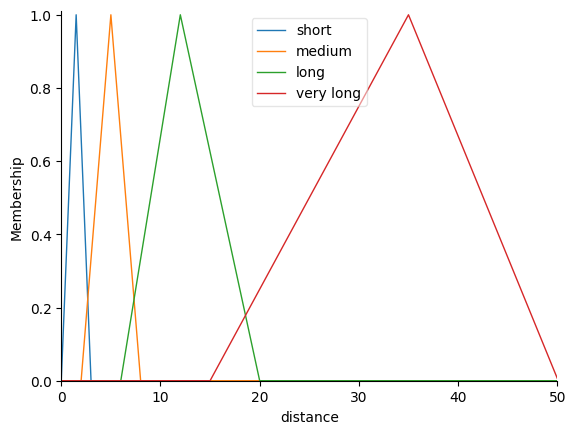

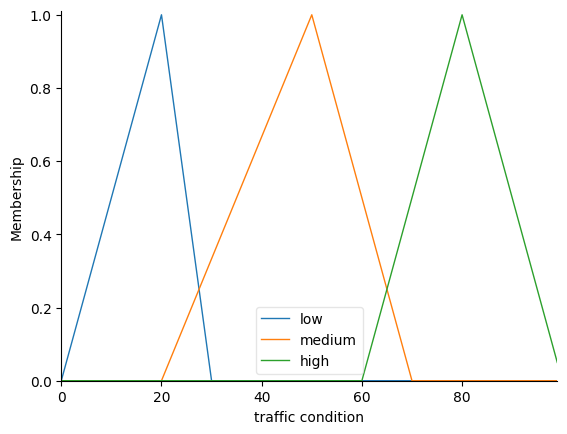

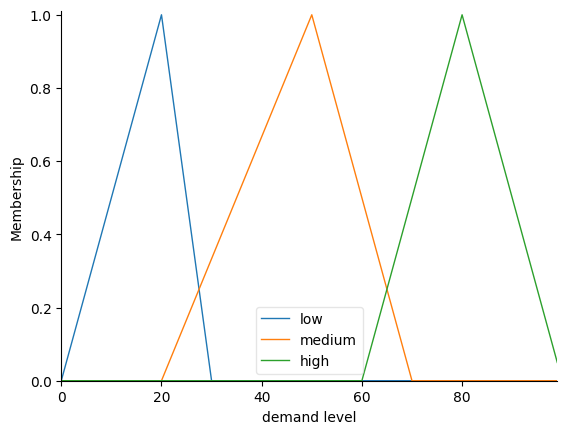

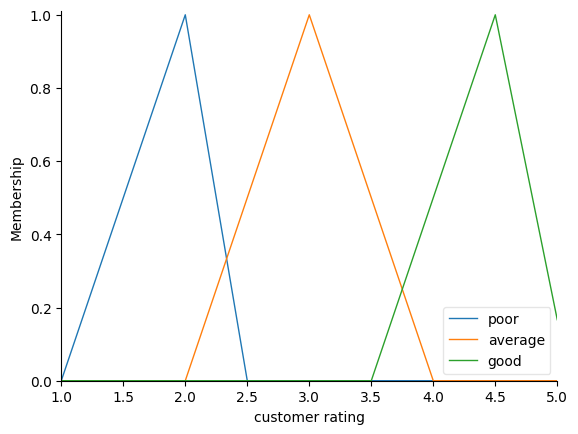

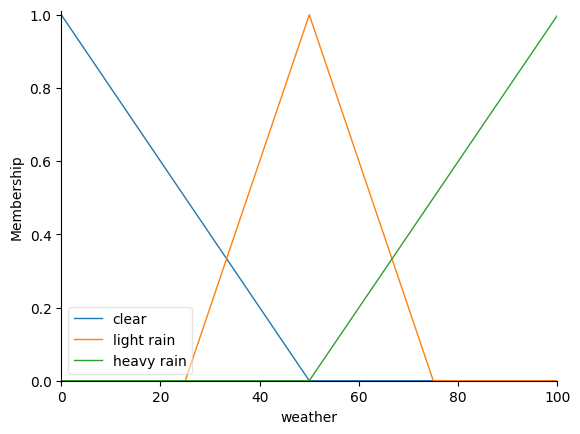

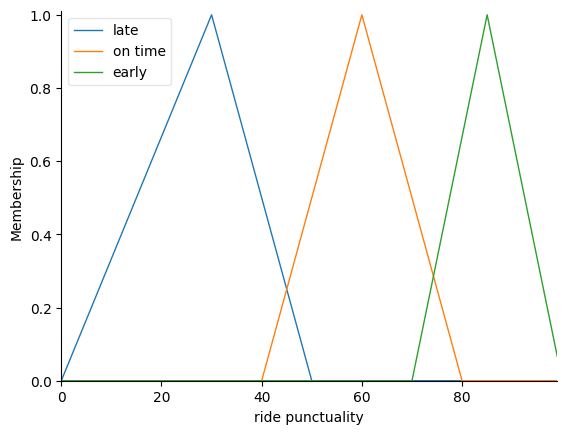

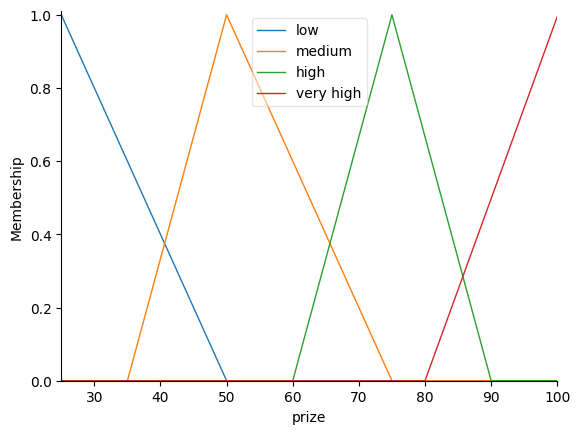

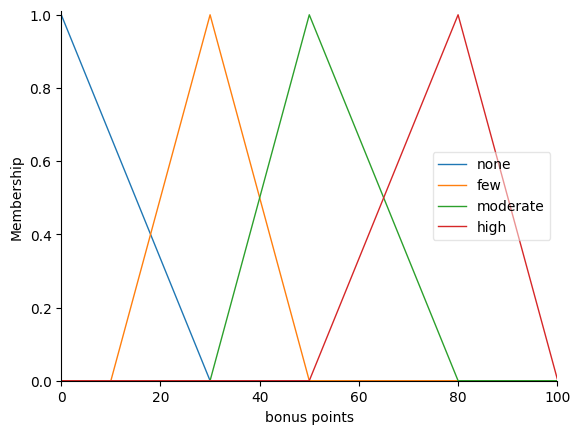

In [42]:
#exam 1


import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


distance=ctrl.Antecedent(np.arange(0,50.1,0.1),'distance')
traffic_condition=ctrl.Antecedent(np.arange(0,100,1),'traffic condition')
demand_level=ctrl.Antecedent(np.arange(0,100,1),'demand level')
rating=ctrl.Antecedent(np.arange(1,5.1,0.1),'customer rating')
weather=ctrl.Antecedent(np.arange(0,100.1,0.1),'weather')
punctuality=ctrl.Antecedent(np.arange(0,100,1),'ride punctuality')
prize=ctrl.Consequent(np.arange(25,100.1,0.1),'prize')
bonus=ctrl.Consequent(np.arange(0,100.1,0.1),'bonus points')



distance['short']=fuzz.trimf(distance.universe,[0,1.5,3])
distance['medium']=fuzz.trimf(distance.universe,[2,5,8])
distance['long']=fuzz.trimf(distance.universe,[6,12,20])
distance['very long']=fuzz.trimf(distance.universe,[15,35,50.1])
traffic_condition['low']=fuzz.trimf(traffic_condition.universe,[0,20,30])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe,[20,50,70])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe,[60,80,100])
demand_level['low']=fuzz.trimf(demand_level.universe,[0,20,30])
demand_level['medium']=fuzz.trimf(demand_level.universe,[20,50,70])
demand_level['high']=fuzz.trimf(demand_level.universe,[60,80,100])
weather['clear']=fuzz.trimf(weather.universe,[0,0,50])
weather['light rain']=fuzz.trimf(weather.universe,[25,50,75])
weather['heavy rain']=fuzz.trimf(weather.universe,[50,100.1,100.1])
rating['poor']=fuzz.trimf(rating.universe,[1,2,2.5])
rating['average']=fuzz.trimf(rating.universe,[2,3,4])
rating['good']=fuzz.trimf(rating.universe,[3.5,4.5,5.1])
punctuality['late']=fuzz.trimf(punctuality.universe,[0,30,50])
punctuality['on time']=fuzz.trimf(punctuality.universe,[40,60,80])
punctuality['early']=fuzz.trimf(punctuality.universe,[70,85,100])
prize['low']=fuzz.trimf(prize.universe,[25,25,50])
prize['medium']=fuzz.trimf(prize.universe,[35,50,75])
prize['high']=fuzz.trimf(prize.universe,[60,75,90])
prize['very high']=fuzz.trimf(prize.universe,[80,100.1,100.1])
bonus['none']=fuzz.trimf(bonus.universe,[0,0,30])
bonus['few']=fuzz.trimf(bonus.universe,[10,30,50])
bonus['moderate']=fuzz.trimf(bonus.universe,[30,50,80])
bonus['high']=fuzz.trimf(bonus.universe,[50,80,100.1])



distance.view()
traffic_condition.view()
demand_level.view()
rating.view()
weather.view()
punctuality.view()
prize.view()
bonus.view()


dict_keys([])


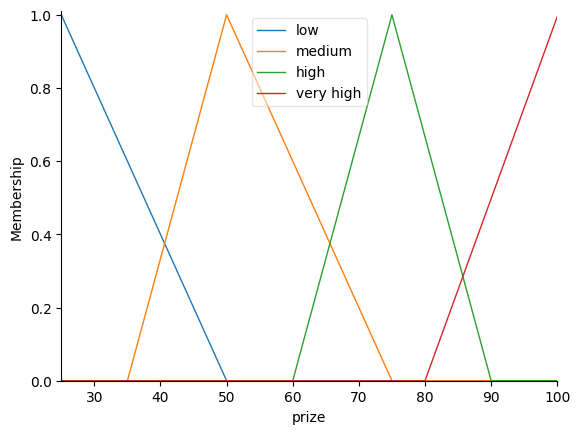

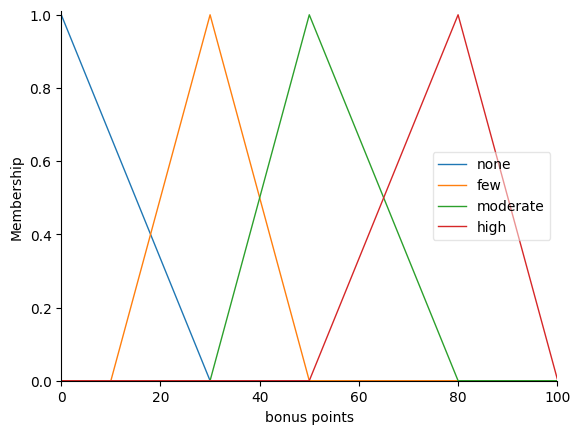

In [44]:
rule1=ctrl.Rule(distance['short']&traffic_condition['low']&demand_level['low'],prize['low'])
rule2=ctrl.Rule(distance['short']&traffic_condition['medium']&demand_level['high'],prize['medium'])
rule3=ctrl.Rule(distance['medium']&traffic_condition['high']&demand_level['high'],prize['high'])
rule4=ctrl.Rule(distance['long']&traffic_condition['medium']&weather['clear'],prize['medium'])
rule5=ctrl.Rule(distance['long']&traffic_condition['high']&weather['heavy rain'],prize['very high'])
rule6=ctrl.Rule(distance['very long']&traffic_condition['high']&demand_level['high'],prize['very high'])
rule7=ctrl.Rule(distance['medium']&traffic_condition['low']&demand_level['low'],prize['medium'])
rule8=ctrl.Rule(distance['short']&traffic_condition['high']&weather['heavy rain'],prize['high'])
rule9=ctrl.Rule(distance['very long']&weather['heavy rain'],prize['high'])
rule10=ctrl.Rule(distance['medium']&traffic_condition['medium']&weather['light rain'],prize['medium'])
rule11=ctrl.Rule(rating['good']&punctuality['early'],bonus['high'])
rule12=ctrl.Rule(rating['average']&punctuality['on time'],bonus['moderate'])
rule13=ctrl.Rule(rating['poor']&punctuality['late'],bonus['none'])
rule14=ctrl.Rule(distance['long']&traffic_condition['high']&punctuality['on time'],bonus['high'])
rule15=ctrl.Rule(distance['medium']&traffic_condition['medium']&rating['good'],bonus['moderate'])
rule16=ctrl.Rule(rating['poor']&punctuality['late'],bonus['none'])
rule17=ctrl.Rule(distance['very long']&weather['heavy rain']&rating['good'],bonus['high'])
rule18=ctrl.Rule(distance['short']&rating['average']&punctuality['on time'],bonus['few'])
rule19=ctrl.Rule(distance['long']&traffic_condition['high']&punctuality['late'],bonus['few'])
rule20=ctrl.Rule(distance['medium']&weather['light rain']&rating['good'],bonus['moderate'])


prize_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
prize_simulation=ctrl.ControlSystemSimulation(prize_ctrl)
prize_simulation.input['distance']=23
prize_simulation.input['traffic condition']=15.5
prize_simulation.input['demand level']=80
prize_simulation.input['customer rating']=4.5
prize_simulation.input['weather']=10
prize_simulation.input['ride punctuality']=40

prize_simulation.compute()
print(prize_simulation.output.keys())



prize.view(sim=prize_simulation)
bonus.view(sim=prize_simulation)
